In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
scaler = MinMaxScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

In [6]:
df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [8]:
x = df[['YearsExperience']]
y = df['Salary']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.005271801128195494
Mean Absolute Error: 0.06096537574297404
Root Mean Squared Error: 0.0726071699503258


In [13]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [1.03694033]
Intercept: -0.018185350447792126


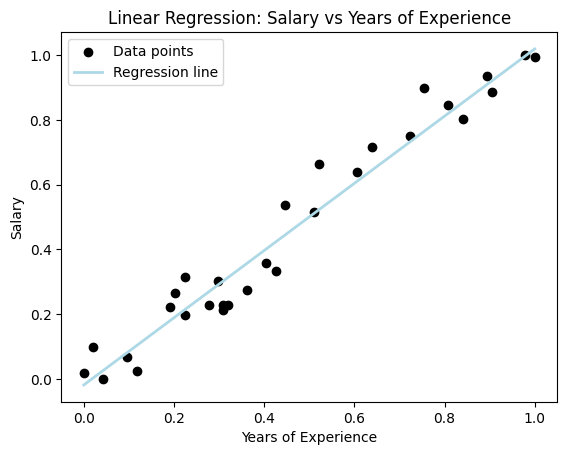

In [15]:
plt.scatter(x, y, color='black', label='Data points')

# Plotting the regression line
plt.plot(x, model.predict(x), color='lightblue', linewidth=2, label='Regression line')

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

LOGICTICS REGRESSION


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
threshold = df['Salary'].median()
df['SalaryClass'] = (df['Salary'] > threshold).astype(int)

In [18]:
print(df)

    YearsExperience    Salary  SalaryClass
0          0.000000  0.019041            0
1          0.021277  0.100094            0
2          0.042553  0.000000            0
3          0.095745  0.068438            0
4          0.117021  0.025514            0
5          0.191489  0.223376            0
6          0.202128  0.264812            0
7          0.223404  0.197425            0
8          0.223404  0.315545            0
9          0.276596  0.229837            0
10         0.297872  0.301051            0
11         0.308511  0.213359            0
12         0.308511  0.227097            0
13         0.319149  0.228561            0
14         0.361702  0.276163            0
15         0.404255  0.356804            1
16         0.425532  0.334255            1
17         0.446809  0.535755            1
18         0.510638  0.515379            1
19         0.521277  0.663938            1
20         0.606383  0.637928            1
21         0.638298  0.715119            1
22         

In [19]:
scaler = MinMaxScaler()
df[['YearsExperience']] = scaler.fit_transform(df[['YearsExperience']])

In [21]:
x = df[['YearsExperience']]
y = df['SalaryClass']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



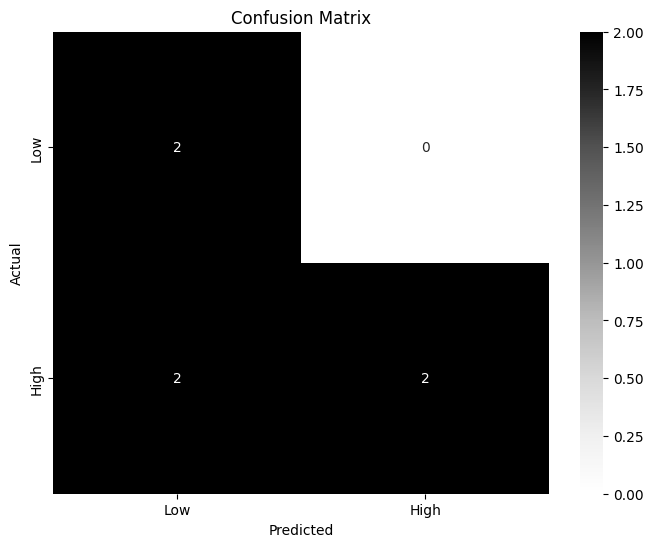

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

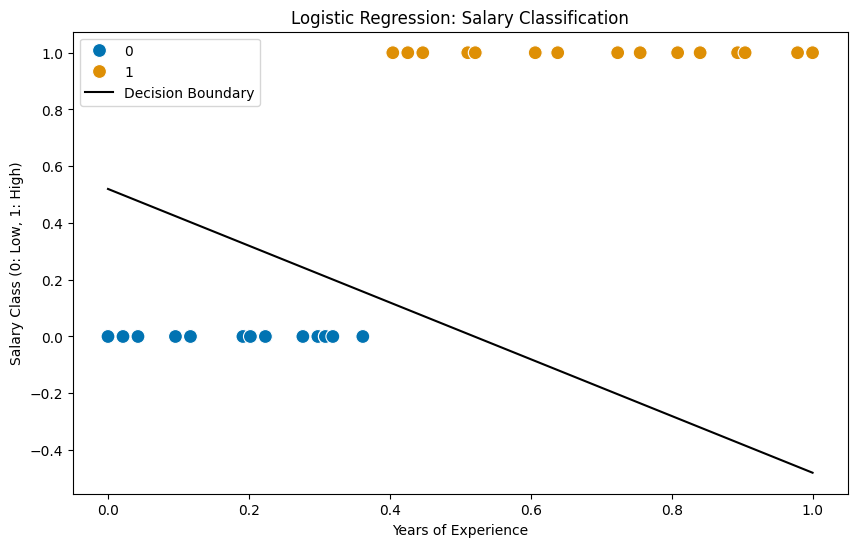

In [31]:
plt.figure(figsize=(10, 6))

# Plotting the data points
sns.scatterplot(x='YearsExperience', y='SalaryClass', data=df, hue='SalaryClass', palette='colorblind', s=100)

# Plotting the decision boundary
x_values = np.linspace(x['YearsExperience'].min(), x['YearsExperience'].max(), 200)
y_values = -(model.intercept_ + model.coef_[0] * x_values) / model.coef_[0][0]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary Class (0: Low, 1: High)')
plt.title('Logistic Regression: Salary Classification')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()